<a href="https://colab.research.google.com/github/KiokoMc/Dev-DataScience/blob/main/Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4 #Signo ! para ejecutar comandos de Linux en colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Le vamos a hacer Web Scrapping a esta página:
https://www.usclimatedata.com/climate/united-states/us


In [3]:
import requests
r = requests.get("https://www.usclimatedata.com/climate/united-states/us")

In [4]:
len(r.text)

42419

In [6]:
r.text #Formato html

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-NGZ4B4W\');</script>\n\t<meta http-equiv="content-type" content="text/html; charset=utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" /><meta name="robots" content="index, follow" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="description" content="United States. Information regarding the temperature, precipitation and sunshine for cities and locations in United States. See the climate charts and averages for your city."><meta name="keywords" content="United States, climate, temperature, precipitation, sunshine, averag

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(r.text)

In [13]:
soup.title #Puedo acceder al contenido de esos packs como si fueran atributos de Python (title/head/body, etc)

<title>Climate United States - Normals and averages</title>

In [14]:
soup.title.text

'Climate United States - Normals and averages'

In [15]:
soup.title.string

'Climate United States - Normals and averages'

In [17]:
soup.p #Solo me brinda la primer párrafo, pero quiero poder conocer todas

<p class="selection_title">Select a state by name</p>

In [19]:
soup.p.text

'Select a state by name'

In [18]:
soup.a #Son las etiquetas que contienen los hipervínculos

<a class="navbar-brand" href="/" title="Temperature - Precipitation - Sunshine - Snowfall"><img alt="Temperature - Precipitation - Sunshine - Snowfall" data-src="https://www.usclimatedata.com/assets/images/us-climate-data.png" height="34" src="https://www.usclimatedata.com/assets/images/us-climate-data.png" srcset="https://www.usclimatedata.com/assets/images/us-climate-data.png 1x, https://www.usclimatedata.com/assets/images/us-climate-data-2.png 2x" width="31"/><span class="white ml-2">U.S. Climate Data</span></a>

In [21]:
soup.a['title'] #Como title no es la etiqueta porque ahora lo es "a", tenemos que acceder a title como si fuera diccionario.

'Temperature - Precipitation - Sunshine - Snowfall'

In [29]:
soup.p.parent #El resultado es la división padre que contiene a mi párrafo, 
#este comando puede ser recursivo, es decir, puedo ver el padre de mi padre (abuelo)

<div class="float-left mb-4 mt-2"><p class="selection_title">Select a state by name</p></div>

In [24]:
soup.p.parent.parent #Abuelo

<div class="box ribbon-box d-none d-md-block"><div class="ribbon ribbon-info float-right"><svg aria-hidden="true" focusable="false" height="14px" preserveaspectratio="xMidYMid meet" style="vertical-align: text-top;margin-right:10px!important;-ms-transform: rotate(360deg); -webkit-transform: rotate(360deg); transform: rotate(360deg);" viewbox="0 0 24 24" width="14px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><path d="M12 11.5A2.5 2.5 0 0 1 9.5 9A2.5 2.5 0 0 1 12 6.5A2.5 2.5 0 0 1 14.5 9a2.5 2.5 0 0 1-2.5 2.5M12 2a7 7 0 0 0-7 7c0 5.25 7 13 7 13s7-7.75 7-13a7 7 0 0 0-7-7z" fill="#ffffff"></path><rect fill="rgba(0, 0, 0, 0)" height="24" width="24" x="0" y="0"></rect></svg>United States Map</div><div class="float-left mb-4 mt-2"><p class="selection_title">Select a state by name</p></div><div class="ribbon-content"><div class="mapcontainer mt-5"><div class="map"><span> </span></div><div class="areaLegend"></div><div class="plotLegend"></div></div></div></d

In [27]:
print(soup.p.parent.prettify()) #Se imprime más estético/bonito --> con prettify (Cómo si se estuviera programando)

<div class="float-left mb-4 mt-2">
 <p class="selection_title">
  Select a state by name
 </p>
</div>



In [30]:
soup.find_all('p') #Me regresa una lista con todas las etiquetas "p"

[<p class="selection_title">Select a state by name</p>,
 <p class="selection_title">Select a state by name</p>,
 <p><svg aria-hidden="true" focusable="false" height="16px" preserveaspectratio="xMidYMid meet" style="vertical-align: text-bottom;-ms-transform: rotate(360deg); -webkit-transform: rotate(360deg); transform: rotate(360deg);" viewbox="0 0 24 24" width="16px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><path d="M15 13V5a3 3 0 0 0-6 0v8a5 5 0 1 0 6 0m-3-9a1 1 0 0 1 1 1v3h-2V5a1 1 0 0 1 1-1z" fill="#0659b0"></path><rect fill="rgba(0, 0, 0, 0)" height="24" width="24" x="0" y="0"></rect></svg><a class="ml-2" href="/climate/washington/district-of-columbia/united-states/usdc0001" title="Climate">More Climate Data Washington</a></p>,
 <p class="lead">Share</p>,
 <p class="lead">Station Data</p>,
 <p>Monthly averages Washington<br/>Longitude: -77.0377, Latitude: 38.8521<br/>Average weather Washington, DC - 22202</p>,
 <p>Monthly: 1981-2010 normals</p>,

Vamos a crear un DataFrame con todas las temperaturas máximas y mínimas (De Enero a Diciembre) de todos los Estados:

In [33]:
soup.find_all('a') #De aquì sacamos todos los hipervínculos

[<a class="navbar-brand" href="/" title="Temperature - Precipitation - Sunshine - Snowfall"><img alt="Temperature - Precipitation - Sunshine - Snowfall" data-src="https://www.usclimatedata.com/assets/images/us-climate-data.png" height="34" src="https://www.usclimatedata.com/assets/images/us-climate-data.png" srcset="https://www.usclimatedata.com/assets/images/us-climate-data.png 1x, https://www.usclimatedata.com/assets/images/us-climate-data-2.png 2x" width="31"/><span class="white ml-2">U.S. Climate Data</span></a>,
 <a aria-expanded="false" aria-haspopup="true" class="nav-link dropdown-toggle" data-toggle="dropdown" href="#" id="config_btn" title="Select Fahrenheit or Celcius"><span class="sr-only">Toggle Dropdown</span><svg aria-hidden="true" focusable="false" height="18px" preserveaspectratio="xMidYMid meet" style="vertical-align:text-bottom; -ms-transform: rotate(360deg); -webkit-transform: rotate(360deg); transform: rotate(360deg);" viewbox="0 0 24 24" width="18px" xmlns="http://

In [37]:
for link in soup.find_all('a'):
  print(link['href'])
  #HREF es la propiedad que contiene los nombres de los estados. Nos interesa que contengan "climate" pero que no diga "united-states"

/
#
/
/climate/united-states/us
/
/climate/united-states/us
/climate/alabama/united-states/3170
/climate/alaska/united-states/3171
/climate/arizona/united-states/3172
/climate/arkansas/united-states/3173
/climate/california/united-states/3174
/climate/colorado/united-states/3175
/climate/connecticut/united-states/3176
/climate/delaware/united-states/3177
/climate/district-of-columbia/united-states/3178
/climate/florida/united-states/3179
/climate/georgia/united-states/3180
/climate/hawaii/united-states/3181
/climate/idaho/united-states/3182
/climate/illinois/united-states/3183
/climate/indiana/united-states/3184
/climate/iowa/united-states/3185
/climate/kansas/united-states/3186
/climate/kentucky/united-states/3187
/climate/louisiana/united-states/3188
/climate/maine/united-states/3189
/climate/maryland/united-states/1872
/climate/massachusetts/united-states/3191
/climate/michigan/united-states/3192
/climate/minnesota/united-states/3193
/climate/mississippi/united-states/3194
/climate/

In [40]:
base_url = 'https://www.usclimatedata.com'
state_links = []
for link in soup.find_all('a'):
  url=link['href']
  if '/climate/' in url and '/climate/united-states/us' not in url:
    state_links.append(url)

In [41]:
state_links

['/climate/alabama/united-states/3170',
 '/climate/alaska/united-states/3171',
 '/climate/arizona/united-states/3172',
 '/climate/arkansas/united-states/3173',
 '/climate/california/united-states/3174',
 '/climate/colorado/united-states/3175',
 '/climate/connecticut/united-states/3176',
 '/climate/delaware/united-states/3177',
 '/climate/district-of-columbia/united-states/3178',
 '/climate/florida/united-states/3179',
 '/climate/georgia/united-states/3180',
 '/climate/hawaii/united-states/3181',
 '/climate/idaho/united-states/3182',
 '/climate/illinois/united-states/3183',
 '/climate/indiana/united-states/3184',
 '/climate/iowa/united-states/3185',
 '/climate/kansas/united-states/3186',
 '/climate/kentucky/united-states/3187',
 '/climate/louisiana/united-states/3188',
 '/climate/maine/united-states/3189',
 '/climate/maryland/united-states/1872',
 '/climate/massachusetts/united-states/3191',
 '/climate/michigan/united-states/3192',
 '/climate/minnesota/united-states/3193',
 '/climate/mi

In [42]:
len(state_links)

53

In [51]:
#https://www.usclimatedata.com/climate/alabama/united-states/3170
r = requests.get(base_url + state_links[0])
soup = BeautifulSoup(r.text)
print(soup.body.text)




U.S. Climate DataToggle Dropdown ºF  ºC Home United StatesAlabama ºF  ºC You are here:Alabama United StatesHome United StatesAlabama ºF  ºC 



Alabama TableAlabama - Select a city by nameAddisonAlabasterAlexander CityAlicevilleAndalusiaAndersonAshlandAthensAtmoreAuburnBay MinetteBeatriceBessemerBirminghamBoligeeBrentBrewtonBridgeportBurgosCamdenCamp HillCentreCentrevilleChatomChildersburgClantonClaytonCodenCourtlandCrossvilleCullmanDecaturDemopolisEnterpriseEufaulaEvergreenFairhopeFalkvilleFayetteFloralaFort PayneFrisco CityGadsdenGainesvilleGenevaGreensboroGreenvilleGuntersvilleHaleyvilleHamiltonHancevilleHeadlandHeflinHelenaHighland HomeHope HullHuntsvilleJacksonJasperKellytonLafayetteLinevilleLivingstonMarionMarion JunctionMidland CityMobileMontgomeryMoultonMuscle ShoalsNew HopeNorthportOneontaOpelikaOzarkPelhamPinsonRoanokeRobertsdaleRockfordRussellvilleScottsboroSelmaShorterSylacaugaTalladegaTallasseeTannerThomasvilleThorsbyTroyTuscaloosaUnion SpringsValley HeadVernonWetumpkaW

In [49]:
r #Significa que si accede a la página

<Response [200]>

In [53]:
rows = soup.find_all('tr')
print(len(rows))

14


In [54]:
rows

[<tr><th class="title tablesaw-swipe-cellpersist" data-tablesaw-priority="persist" data-tablesaw-sortable-col="" scope="col"> </th><th class="text-right" scope="col"><span class="d-none d-sm-block"><abbr title="January">Jan</abbr></span><span class="d-block d-sm-none"><abbr title="January">Ja</abbr></span></th><th class="text-right" scope="col"><span class="d-none d-sm-block"><abbr title="February">Feb</abbr></span><span class="d-block d-sm-none"><abbr title="February">Fe</abbr></span></th><th class="text-right" scope="col"><span class="d-none d-sm-block"><abbr title="March">Mar</abbr></span><span class="d-block d-sm-none"><abbr title="March">Ma</abbr></span></th><th class="text-right" scope="col"><span class="d-none d-sm-block"><abbr title="April">Apr</abbr></span><span class="d-block d-sm-none"><abbr title="April">Ap</abbr></span></th><th class="text-right" scope="col"><span class="d-none d-sm-block"><abbr title="May">May</abbr></span><span class="d-block d-sm-none"><abbr title="May"

In [55]:
rows2 = [row for row in rows if 'Average high in ºF' in str(row)]

In [57]:
rows2 #Solo nos quedamos con las 2 filas de los 12 meses que necesitamos

[<tr><th class="font-weight-normal" data-tablesaw-priority="persist" scope="row"><span class="d-none d-lg-block">Average high in ºF </span><span class="d-none d-sm-block d-lg-none">Av. high </span><span class="d-block d-sm-none">Hi </span></th><td class="high text-right">54</td><td class="high text-right">58</td><td class="high text-right">67</td><td class="high text-right">74</td><td class="high text-right">82</td><td class="high text-right">88</td></tr>,
 <tr><th class="font-weight-normal" data-tablesaw-priority="persist" scope="row"><span class="d-none d-lg-block">Average high in ºF </span><span class="d-none d-sm-block d-lg-none">Av. high </span><span class="d-block d-sm-none">Hi </span></th><td class="high text-right">91</td><td class="high text-right">91</td><td class="high text-right">85</td><td class="high text-right">75</td><td class="high text-right">65</td><td class="high text-right">56</td></tr>]

In [58]:
rows2[0].find_all('td')

[<td class="high text-right">54</td>,
 <td class="high text-right">58</td>,
 <td class="high text-right">67</td>,
 <td class="high text-right">74</td>,
 <td class="high text-right">82</td>,
 <td class="high text-right">88</td>]

In [60]:
tds = rows2[0].find_all('td')
high_temps = [td.text for td in tds]

In [61]:
high_temps

['54', '58', '67', '74', '82', '88']

In [62]:
rows3 = [row for row in rows if 'Average low in ºF' in str(row)]
tds = rows3[0].find_all('td')
low_temps = [td.text for td in tds]
low_temps

['34', '37', '44', '51', '60', '68']

Los pasos anteriores solo tomaban la fila 0. Ahora para todas:

In [64]:
high_temps = []
for row in rows2:
  tds = row.find_all('td')
  high_temps = high_temps + [td.text for td in tds]

print(high_temps)

['54', '58', '67', '74', '82', '88', '91', '91', '85', '75', '65', '56']


In [65]:
s = soup.title.text

In [66]:
s

'Climate Alabama - Temperature, Rainfall and Averages'

In [67]:
s.find(' ')

7

In [68]:
s.find('-')

16

In [73]:
s[s.find(' '):s.find('-')].strip() #Quita los espacios al inicio y al final (strip)

'Alabama'

In [74]:
state = s[s.find(' '):s.find('-')].strip()

In [75]:
state

'Alabama'

In [76]:
data = {}
data[state] = high_temps

In [77]:
data

{'Alabama': ['54',
  '58',
  '67',
  '74',
  '82',
  '88',
  '91',
  '91',
  '85',
  '75',
  '65',
  '56']}

Para todos los Estados:

In [78]:
data = {}
for link in state_links:
  url = base_url + link
  r = requests.get(url)
  soup = BeautifulSoup(r.text)
  rows = soup.find_all('tr')
  rows = [row for row in rows if 'Average high in ºF' in str(row)]
  high_temps = []
  for row in rows:
    tds = row.find_all('td')
    high_temps = high_temps + [td.text for td in tds]
  s = soup.title.text
  state = s[s.find(' '):s.find('-')].strip()
  data[state] = high_temps

In [79]:
data

{'Alabama': ['54',
  '58',
  '67',
  '74',
  '82',
  '88',
  '91',
  '91',
  '85',
  '75',
  '65',
  '56'],
 'Alaska': ['23',
  '27',
  '34',
  '44',
  '56',
  '63',
  '65',
  '64',
  '55',
  '40',
  '28',
  '25'],
 'Arizona': ['67',
  '71',
  '77',
  '85',
  '95',
  '104',
  '106',
  '104',
  '100',
  '89',
  '76',
  '66'],
 'Arkansas': ['51',
  '55',
  '64',
  '73',
  '81',
  '89',
  '92',
  '93',
  '86',
  '75',
  '63',
  '52'],
 'California': ['54',
  '60',
  '65',
  '71',
  '80',
  '87',
  '92',
  '91',
  '87',
  '78',
  '64',
  '54'],
 'Colorado': ['45',
  '46',
  '54',
  '61',
  '72',
  '82',
  '90',
  '88',
  '79',
  '66',
  '52',
  '45'],
 'Connecticut': ['37',
  '40',
  '47',
  '58',
  '68',
  '77',
  '82',
  '81',
  '74',
  '63',
  '53',
  '42'],
 'Delaware': ['43',
  '47',
  '55',
  '66',
  '75',
  '83',
  '87',
  '85',
  '79',
  '69',
  '58',
  '47'],
 'District Of Columbia': ['42',
  '44',
  '53',
  '64',
  '75',
  '83',
  '87',
  '84',
  '78',
  '67',
  '55',
  '45'],
 '

In [80]:
import pandas as pd

In [84]:
temps = pd.DataFrame(data).transpose()
temps.columns = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']

In [85]:
temps

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Alabama,54,58,67,74,82,88,91,91,85,75,65,56
Alaska,23,27,34,44,56,63,65,64,55,40,28,25
Arizona,67,71,77,85,95,104,106,104,100,89,76,66
Arkansas,51,55,64,73,81,89,92,93,86,75,63,52
California,54,60,65,71,80,87,92,91,87,78,64,54
Colorado,45,46,54,61,72,82,90,88,79,66,52,45
Connecticut,37,40,47,58,68,77,82,81,74,63,53,42
Delaware,43,47,55,66,75,83,87,85,79,69,58,47
District Of Columbia,42,44,53,64,75,83,87,84,78,67,55,45
Florida,64,67,74,80,87,91,92,92,88,81,73,65


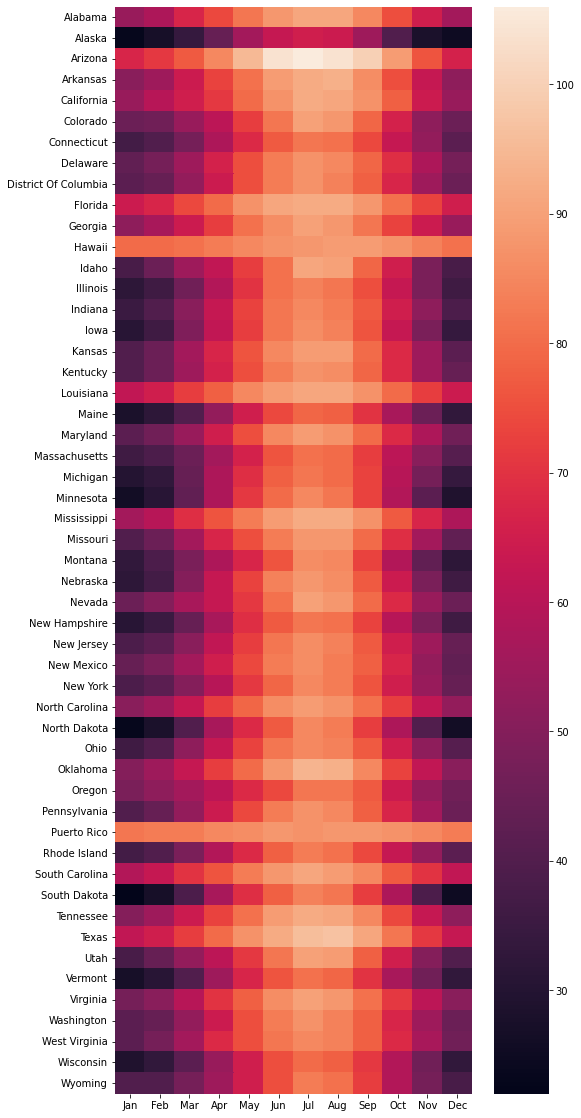

In [92]:
import seaborn as sns
from matplotlib import rcParams

#Figure size in inches
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,10))
rcParams['figure.figsize'] = 8,20
sns.heatmap(temps.apply(pd.to_numeric))
